In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# /content/drive/MyDrive/insert path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Cropping2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
from PIL import Image
from keras.preprocessing.image  import ImageDataGenerator    # Keras libaray to manage image files

In [ ]:
base_dir = '/content/drive/Othercomputers/My Surface Laptop/1hundred percent Coding/Personal Programming/ML/Scenes of Nature Dataset'
train_dir = os.path.join(base_dir, 'seg_train/seg_train')
validation_dir = os.path.join(base_dir,'seg_test/seg_test')
test_dir = os.path.join(base_dir, 'seg_pred')

In [ ]:
train_buildings_dir = os.path.join(train_dir, 'buildings')
val_buildings_dir = os.path.join(validation_dir, 'buildings')
test_buildings_dir = os.path.join(test_dir, 'buildings')

train_forest_dir = os.path.join(train_dir, 'forest')
val_forest_dir = os.path.join(validation_dir, 'forest')
test_forest_dir = os.path.join(test_dir, 'forest')

train_glacier_dir = os.path.join(train_dir, 'glacier')
val_glacier_dir = os.path.join(validation_dir, 'glacier')
test_glacier_dir = os.path.join(test_dir, 'glacier')

train_mountain_dir = os.path.join(train_dir, 'mountain')
val_mountain_dir = os.path.join(validation_dir, 'mountain')
test_mountain_dir = os.path.join(test_dir, 'mountain')

train_sea_dir = os.path.join(train_dir, 'sea')
val_sea_dir = os.path.join(validation_dir, 'sea')
test_sea_dir = os.path.join(test_dir, 'sea')

train_street_dir = os.path.join(train_dir, 'street')
val_street_dir = os.path.join(validation_dir, 'street')
test_street_dir = os.path.join(test_dir, 'street')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
'''
train_generator = train_datagen.flow_from_directory(
   train_dir,                                           # target directory
   target_size=(150, 150),                  # resize all images to 150 x 150
   batch_size=100,                                # batch size
   class_mode='categorical'
)'''

"\ntrain_generator = train_datagen.flow_from_directory(\n   train_dir,                                           # target directory\n   target_size=(150, 150),                  # resize all images to 150 x 150\n   batch_size=100,                                # batch size\n   class_mode='categorical'\n)"

In [ ]:
train_mountain_dir = '/content/drive/Othercomputers/My Surface Laptop/1hundred percent Coding/Personal Programming/ML/Scenes of Nature Dataset/for the autoencoder/training'
val_mountain_dir = '/content/drive/Othercomputers/My Surface Laptop/1hundred percent Coding/Personal Programming/ML/Scenes of Nature Dataset/for the autoencoder/testing'

mountain_train_generator = train_datagen.flow_from_directory(
    train_mountain_dir,
    target_size=(150, 150),  # Assuming you want to resize images to 150x150
    batch_size=32,
    class_mode='input',  # This is important for autoencoders, 'input' means the target will be the input images themselves
    shuffle=True
)

mountain_validation_generator = test_datagen.flow_from_directory(
  val_mountain_dir,
  target_size=(150, 150),
	batch_size=20,
  class_mode='input'
)

Found 938 images belonging to 1 classes.
Found 525 images belonging to 1 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
	batch_size=20,
  class_mode='categorical'
)

Found 3000 images belonging to 6 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(    # repeat the same with the validation 							       #samples
  test_dir,
  target_size=(150, 150),
	batch_size=20,
  class_mode='categorical'
)

Found 3000 images belonging to 6 classes.


In [ ]:
'''
def extract_features(generator, sample_count):
    batch_size = generator.batch_size
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    # print('still alive')
    i = 0
    for inputs_batch, labels_batch in generator:
        i = generator.index(inputs_batch)
        # print(f'still alive {i}')
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
#         i += 1
        if i * batch_size >= sample_count:
            # print(f'still alive {i}')
            break
    return features, labels
'''

"\ndef extract_features(generator, sample_count):\n    batch_size = generator.batch_size\n    features = np.zeros(shape=(sample_count, 4, 4, 512))\n    labels = np.zeros(shape=(sample_count))\n    # print('still alive')\n    i = 0\n    for inputs_batch, labels_batch in generator:\n        i = generator.index(inputs_batch)\n        # print(f'still alive {i}')\n        features_batch = conv_base.predict(inputs_batch)\n        features[i * batch_size : (i + 1) * batch_size] = features_batch\n        labels[i * batch_size : (i + 1) * batch_size] = labels_batch\n#         i += 1\n        if i * batch_size >= sample_count:\n            # print(f'still alive {i}')\n            break\n    return features, labels\n"

In [ ]:
input_img = Input(shape=(150, 150, 3))  # CIFAR10 dimensions

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Cropping2D(cropping=((1, 1), (1, 1)))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 16)        2320  

In [ ]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [ ]:
print(autoencoder.input_shape)
print(autoencoder.output_shape)

(None, 150, 150, 3)
(None, 150, 150, 3)


In [ ]:
spe = mountain_train_generator.samples // mountain_train_generator.batch_size

history = autoencoder.fit(
      mountain_train_generator,
      steps_per_epoch=spe,
      epochs=50,
      validation_data=mountain_validation_generator,
      validation_steps=spe,
    )

Epoch 1/10
29/29 [==============================] - 9s 325ms/step - loss: 0.5255
Epoch 2/10
29/29 [==============================] - 9s 323ms/step - loss: 0.5243
Epoch 3/10
29/29 [==============================] - 9s 316ms/step - loss: 0.5225
Epoch 4/10
29/29 [==============================] - 8s 288ms/step - loss: 0.5233
Epoch 5/10
29/29 [==============================] - 9s 301ms/step - loss: 0.5209
Epoch 6/10
29/29 [==============================] - 10s 327ms/step - loss: 0.5233
Epoch 7/10
29/29 [==============================] - 9s 322ms/step - loss: 0.5216
Epoch 8/10
29/29 [==============================] - 8s 286ms/step - loss: 0.5225
Epoch 9/10
29/29 [==============================] - 12s 401ms/step - loss: 0.5227
Epoch 10/10
29/29 [==============================] - 9s 324ms/step - loss: 0.5201


In [ ]:
'''
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
'''

KeyError: 'accuracy'

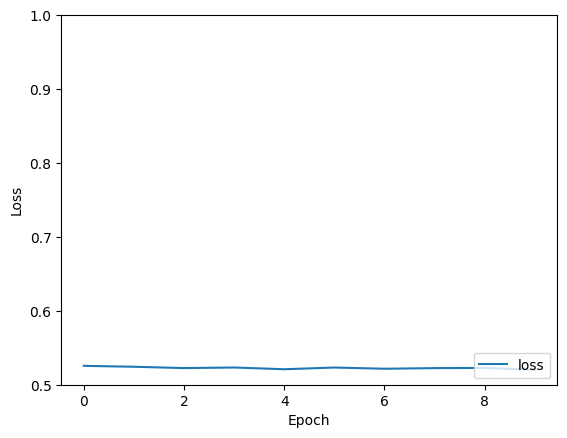

In [ ]:
plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
decoded_imgs = autoencoder.predict(mountain_validation_generator)
# print(decoded_imgs.shape)

27/27 [==============================] - 2s 87ms/step


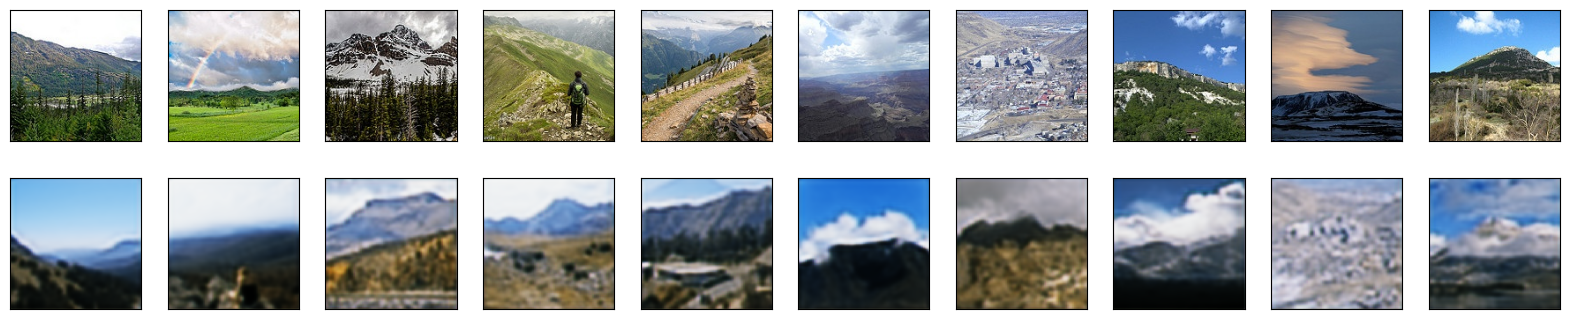

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(len(mountain_validation_generator)):
  for j in range(len(mountain_validation_generator[i])):
    pass

for k in range(1, n+1):
  # Display original
  ax = plt.subplot(2, n, k)
  plt.imshow(mountain_validation_generator[0][0][k])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display reconstruction
  ax = plt.subplot(2, n, k + n)
  # print(decoded_imgs[k].shape)
  plt.imshow(decoded_imgs[k])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()